In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import os

In [2]:
data_folder = "/Users/Emlilio/School/Internships/UR ASTRO/Data/"

In [15]:
drpall_fn = data_folder + 'MaNGA_DR17_BPT_vflag.fits'
drpall_env = Table.read(drpall_fn, format="fits",hdu=1)
drpall_env[6807]

plateifu,vflag_VF,BPT_class,N2Ha,O3Hb
bytes32,int64,float64,float64,float64
8465-12704,1,0.0,-999.0,-999.0


In [32]:
drpall_fn = data_folder + 'drpall_ttype_R90_chi2.fits'
drpall = Table.read(drpall_fn, format="fits",hdu=1)


In [33]:
drpall_dict = {}                                    #create the dictionary

for i in range(len(drpall)):                        #looping through drpall and redefining the index in terms
    plateifu = drpall['plateifu'][i]                #of the plateifu for simplicity			
    drpall_dict[plateifu]=i

In [34]:
stellar_diag = '/Users/Emlilio/School/Internships/UR ASTRO/Data/Plots/stellar_diagnosis'
halpha_diag = '/Users/Emlilio/School/Internships/UR ASTRO/Data/Plots/diagnostic_plots'

stellar_set = []                                
data_set = []                                                    

for filename in os.listdir(stellar_diag):
        plateifu = filename.split('_')[0]
        if plateifu in drpall_dict:
            index = drpall_dict[plateifu]
            stellar_set.append(plateifu)
        else:
            continue

for filename in os.listdir(halpha_diag):
    plateifu = filename.split('_')[0]
    if plateifu in stellar_set:
        index = drpall_dict[plateifu]
        data_set.append(plateifu)
    else:
        continue

In [35]:
index = drpall_dict['12085-9101']
drpall[index]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag,nsa_elpetro_absmag,nsa_elpetro_amivar,nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction,nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux,nsa_petro_flux_ivar,nsa_elpetro_flux,nsa_elpetro_flux_ivar,nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux,nsa_sersic_flux_ivar,TType,R90,vmax,alpha,Rturn,PA,i_angle,center_x,center_y,sys_vel,stellar_vmax,stellar_alpha,stellar_Rturn,stellar_PA,stellar_i_angle,stellar_center_x,stellar_center_y,stellar_sys_vel
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64,float64,float64[7],float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64[7],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
12085,9101,12085-9101,1-570629,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,345.319135799,13.0505876962,85.7978264262,-41.7429070991,345.31914,13.050588,0.196187,9,8100.81,4098,6.03719,27.8624,ma116,26,5,12476,345.5745,14.108707,1.08419,1.1248,1.23791,1.34181,1.45347,1.53695,0.766668,0.779717,0.7913,59030,59031,59031,2.45931,2.52345,2.5405,2.54348,2080,0,0,1,plateTargets-1.par,7745,J230116.59+130302.0,91,91,0,0.048394978,0.023353728,0.03044892,0.045716297,0.050107587,0.0200646,0.03201629,0.56320566,-999.0,0.5283435,0.5941061,0.9106284,1.1253203,-999.0,0.4227379,0.46381652,213,2566,1,v1_0_1,606432,-999,0.048394978,0.049196865,-15.836487 .. -20.84676,-16.770578 .. -20.58281,0.7000908 .. 473.79153,15036122000.0,9269784000.0,0.9203941,149.30684,1.6400783 .. 0.29260263,4.628203,4.949468,4.469042 .. 646.4911,0.038648922 .. 0.0027047028,4.613854 .. 574.8473,0.038811658 .. 0.002946668,0.870202,2.7858202,151.54263,6.4906435,1.9945923 .. 732.40924,0.12842822 .. 0.01350989,1.7099822759628296,11.373337745666504,467.221657576111,2.0545897699848625,1.291026781891981,2.605846505239477,0.19498943365282279,31.616238891897073,31.589907326661542,21.759645273493945,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [96]:
#data_set

In [97]:
#drpall_env[8239-12705]

here i separated the different types of galaxies into their corresponding arrays, in those arrays i stored the difference in position angle rather than the plateifu.

In [85]:
star_forming = []
composite = []
AGN = []
unclassified = []
all_gal = []

for plateifu in data_set:
    index = drpall_dict[plateifu]
    gal_class = drpall_env['BPT_class'][index]
    deltaphi = abs(drpall['stellar_PA'][index] - drpall['PA'][index])
    if deltaphi>500:
        continue
    all_gal.append(abs(deltaphi))
    if gal_class == 0.0:
        deltaphi = drpall['stellar_PA'][index] - drpall['PA'][index]
        unclassified.append(abs(deltaphi))
    elif gal_class == 1.0:
        deltaphi = drpall['stellar_PA'][index] - drpall['PA'][index]
        star_forming.append(abs(deltaphi))
    elif gal_class == 2.0:
        deltaphi = drpall['stellar_PA'][index] - drpall['PA'][index]
        composite.append(abs(deltaphi))
    elif gal_class == 3.0:
        deltaphi = drpall['stellar_PA'][index] - drpall['PA'][index]
        AGN.append(abs(deltaphi))
    else:
        print('error : ',index)
        continue
        


In [89]:
len(all_gal)
np.max(all_gal)

np.float64(5.44392671676544)

Text(0.5, 1.0, 'all_gal angle diff')

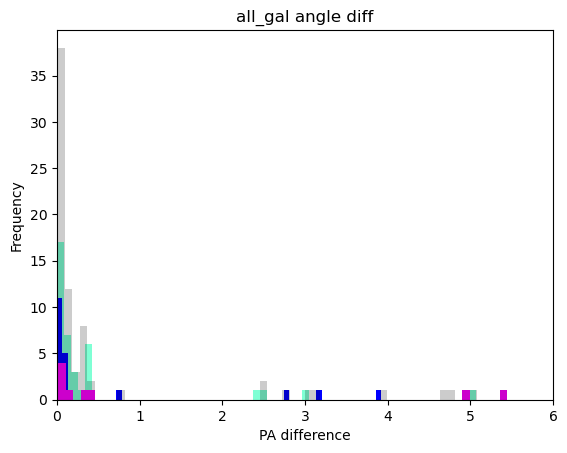

In [116]:

plt.hist(all_gal, bins = 60, color = 'black',zorder = 5, alpha = .2)
plt.hist(star_forming, bins = 60, color = 'aquamarine' )
plt.hist(composite, bins = 60, color = 'blue' )
plt.hist(AGN, bins = 60, color = 'magenta' )


plt.xlim(0,round(np.max(all_gal)+1))
plt.ylabel('Frequency')

plt.xlabel('PA difference')

plt.title('all_gal angle diff')